<a href="https://colab.research.google.com/github/PecaJosef/MPA-MLF-Pecka/blob/main/CV3_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

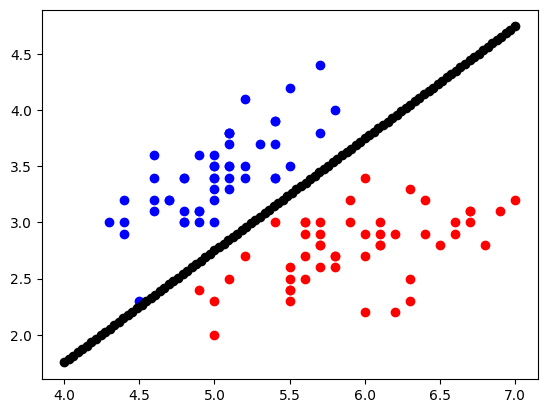

In [78]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

iris=load_iris()
iris.feature_names
#print(iris.feature_names)
#print(iris.data[:100,:2])
#print(iris.target[:100])

X=iris.data[:100,:2]
y=iris.target[:100]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)
#print(X_train.shape)
#print(X_test.shape)

SVMmodel = SVC(kernel='linear')
SVMmodel.fit(X_train, y_train)
SVMmodel.score(X_test, y_test)

plt.scatter(X[y==0,0], X[y==0,1], color= 'blue')
plt.scatter(X[y==1,0], X[y==1,1], color= 'red')
#plt.scatter(X[y==2,3], X[y==2,1], color= 'green')

W=SVMmodel.coef_
b=SVMmodel.intercept_


X1 = np.linspace(4,7,100)
X2 = (-b-W[0,0]*X1)/W[0,1]

# [w0 w1]*[x0 x1] + b = 0 -> x1*w0+x2*w1 + b = 0
plt.scatter (X1,X2, color='black')


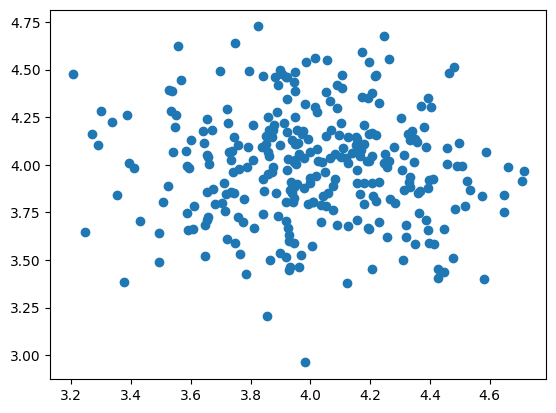

(3.130353778593399, 4.789304780827663, 2.8736980074050735, 4.814475546788681)

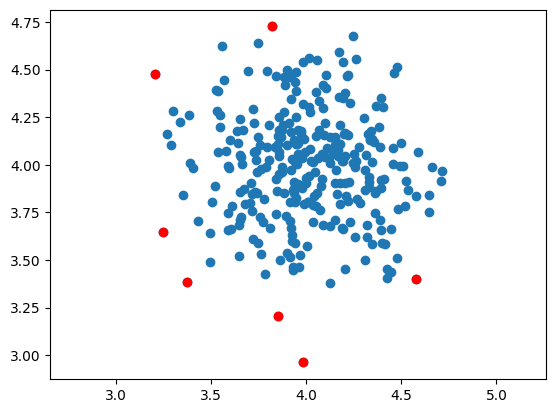

In [95]:
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import quantile, where, random

random.seed(11)
x, _ = make_blobs(n_samples=300, centers=1, cluster_std=.3, center_box=(4, 4))

plt.scatter(x[:,0], x[:,1])
plt.show()

SVMmodelOne = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)

SVMmodelOne.fit(x)
prediction = SVMmodelOne.predict(x)
#print(prediction)

anomaly_index = where(prediction == -1)
anomaly = x[anomaly_index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(anomaly[:,0], anomaly[:,1], color='red')
plt.axis('equal')


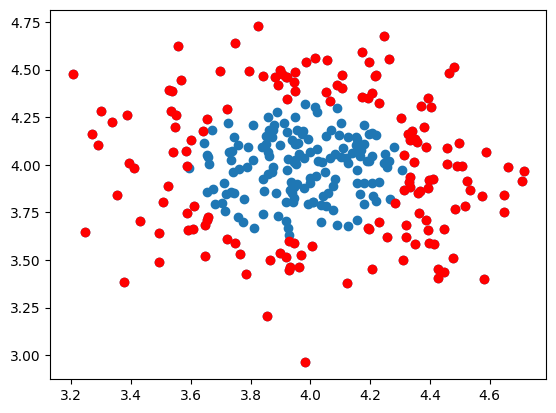

In [99]:
scores = SVMmodelOne.score_samples(x)
thresh = quantile(scores, 0.5)
index = where(scores<thresh)
values = x[index]

plt.scatter(x[:,0],x[0:,1])
plt.scatter(values[:,0], values[0:,1], color='red')

